In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import astropy
from astropy.timeseries import LombScargle
import aplpy

# LightCurve U18

In [2]:
cp ../u9712005/*18.npy .

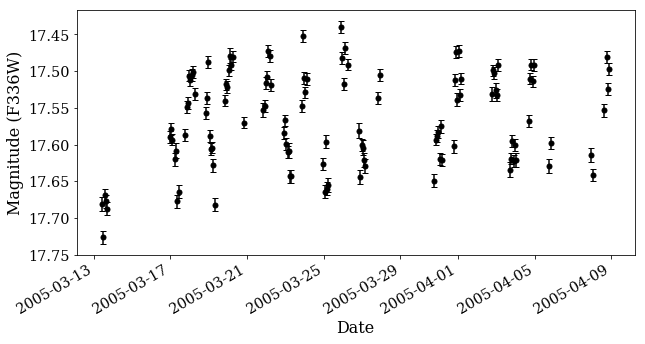

In [3]:
############
name = 'u18'
mjd = np.load('mjd'+name+'.npy')
mag = np.load('mag'+name+'.npy')
dmag = np.load('dmag'+name+'.npy')
obnames = np.load('obnames'+name+'.npy')
time = np.load('time'+name+'.npy')

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')


fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.invert_yaxis()
ax.set_xlabel('Date',fontsize=16)
ax.set_ylabel('Magnitude (F336W)',fontsize=16)
ax.errorbar(time, mag, yerr=dmag,fmt='.',color='k',capsize=3)


plt.plot_date(time, mag,color='k',ms=5)

plt.gcf().autofmt_xdate()
plt.show()

#save iamge
fig.savefig('lcdate.eps', format='eps')

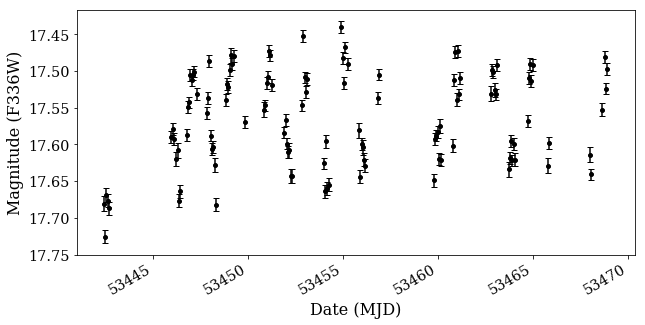

In [4]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')


fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.invert_yaxis()
ax.set_xlabel('Date (MJD)',fontsize=16)
ax.set_ylabel('Magnitude (F336W)',fontsize=16)
ax.errorbar(mjd, mag, yerr=dmag,fmt='.',color='k',capsize=3)


plt.scatter(mjd, mag,color='k',s=15)

plt.gcf().autofmt_xdate()
plt.show()

#save iamge
fig.savefig('lcurvemjd.eps', format='eps')

# Periodogram

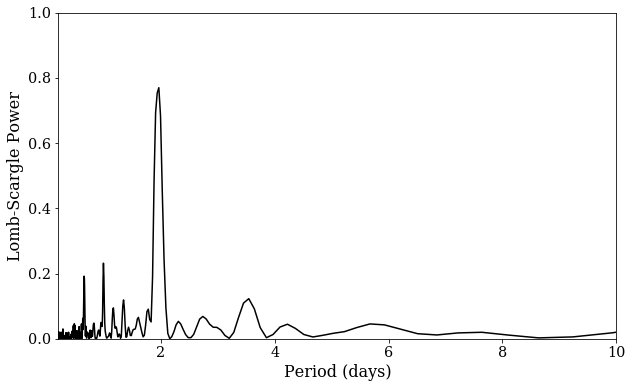

In [5]:

freq, PLS = LombScargle(mjd, mag, dmag).autopower(minimum_frequency=1 / 100.,
                                                maximum_frequency=1 / 0.1)
best_freq = freq[np.argmax(PLS)]
phase = (mjd * best_freq) % 1

# compute the best-fit model
phase_fit = np.linspace(0, 1,len(mjd))
mag_fit = LombScargle(mjd, mag, dmag).model(t=phase_fit / best_freq,
                                          frequency=best_freq)
# plot the periodogram

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')


fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(1, 1, 1)
ax.set(xlim=(0.2, 10),
          ylim=(0, 1));
ax.set_xlabel('Period (days)',fontsize=16)
ax.set_ylabel('Lomb-Scargle Power',fontsize=16)


plt.plot(1. / freq, PLS,color='k',ls='solid')

plt.show()
#save iamge
fig.savefig('periodogram.eps', format='eps')

# Fit gaussian

Parameter('mean', value=1.9543068226229294) Parameter('stddev', value=0.06489563113056655, bounds=(1.1754943508222875e-38, None))


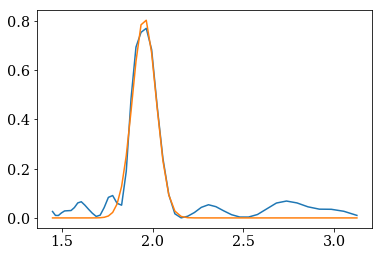

In [54]:
from astropy import modeling

fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D()   # depending on the data you need to give some initial values


per = 1/freq
persmall = per[np.argmax(PLS)-25:np.argmax(PLS)+25]
PLSsmall = PLS[np.argmax(PLS)-25:np.argmax(PLS)+25]


fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D(amplitude=0.5, mean=2.0)   # depending on the data you need to give some initial values



per = 1/freq
persmall = per[np.argmax(PLS)-25:np.argmax(PLS)+25]
PLSsmall = PLS[np.argmax(PLS)-25:np.argmax(PLS)+25]

fitted_model = fitter(model, persmall, PLSsmall)



plt.plot(persmall,PLSsmall)
plt.plot(persmall, fitted_model(persmall))
print(fitted_model.mean,fitted_model.stddev)

In [51]:
fitted_model.mean
fitted_model.stddev

Parameter('stddev', value=0.06489562813935555, bounds=(1.1754943508222875e-38, None))

# Folded

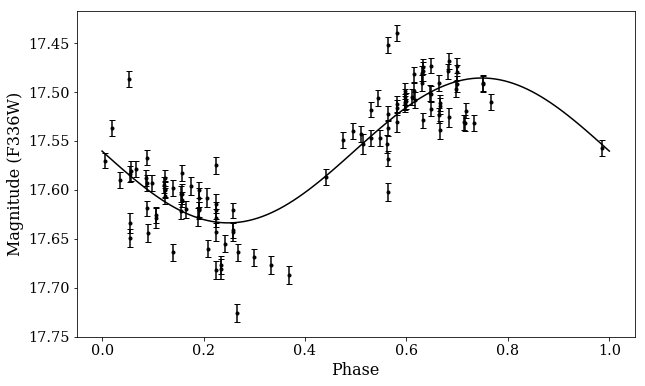

In [222]:
# plot the periodogram

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')


fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(1, 1, 1)
ax.invert_yaxis()


ax.set_xlabel('Phase',fontsize=16)
ax.set_ylabel('Magnitude (F336W)',fontsize=16)


plt.plot(phase_fit, mag_fit,color='k',ls='solid')
ax.errorbar(phase, mag,  dmag,fmt='.',color='k',capsize=3)


plt.show()

#save iamge
fig.savefig('folded.eps', format='eps')

# Region

INFO: Auto-setting vmin to -1.375e-01 [aplpy.core]
INFO: Auto-setting vmax to  8.326e-01 [aplpy.core]
INFO: Auto-setting resolution to 12.0535 dpi [aplpy.core]


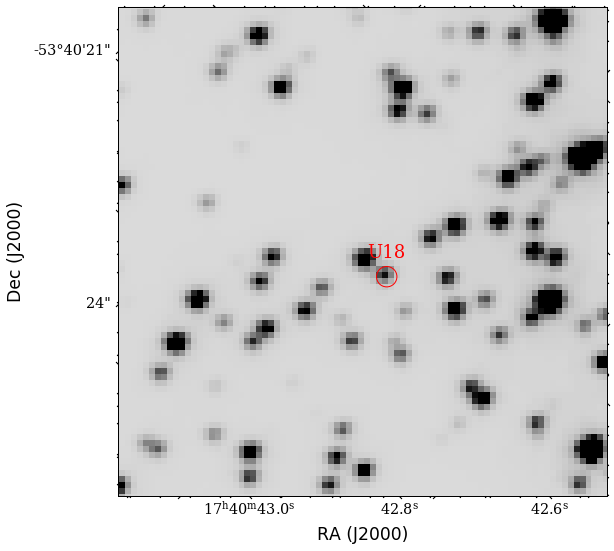

In [223]:
f = aplpy.FITSFigure('../u9712005/FixeWCSofReference/Fixedfinal_drz_sci.chip0.fits')
f.show_grayscale(invert='True')
f.recenter(265.1771907, -53.6739587, radius=0.0011330)  # degrees
f.show_regions('u18reg.reg')
f.axis_labels.set_font(size='xx-large', weight='medium', \
                         stretch='normal', family='sans-serif', \
                         style='normal', variant='normal')


#save fig
f.savefig('hstimage.eps')

# orbital period vs mass

Data from ATNF Pulsar Catalog with:

For redbacks:

bincomp(MS) && PB < 100 && MedMass < 5

For He WD:
bincomp(He) && PB < 100 && MedMass < 5

For Bwid:

bincomp(UL) && PB < 1 && MedMass < 0.05

In [224]:
red = np.genfromtxt('redbacks.txt',delimiter=';')
PBred=red[1:,2]
medmassred = red[1:,3]

hewd = np.genfromtxt('HeWD.txt',delimiter=';')
PBHe=hewd[1:,2]
medmassHe = hewd[1:,3]



bw = np.genfromtxt('blackw.txt',delimiter=';')
PBbw= bw[1:,2]
medmassbw = bw[1:,3]

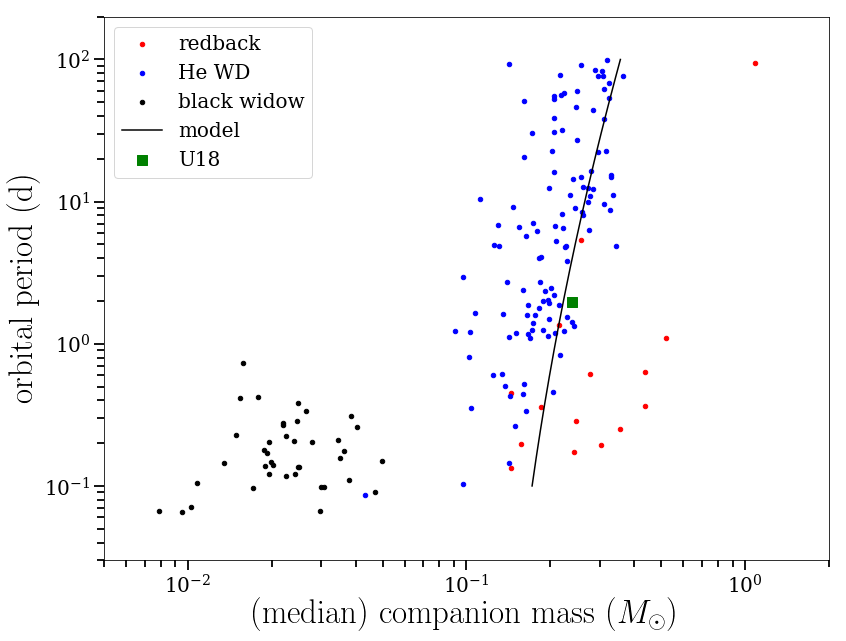

In [245]:

fig = plt.figure(figsize=(13, 10))
ax = plt.gca(xlim=[0.005,2],ylim=[0.03,200])

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)


#Model
#massrange = np.arange(0.18,0.45,0.001)
porb = np.arange(0.1,100,0.001)
a = 5.00
b = 1.1*10**(5)
c = 0.11
modelmass = [(i/b)**(1/a) + c for i in porb]
models, = ax.plot(modelmass, porb,color='k',label='model')

#


reds = ax.scatter(medmassred, PBred,color='r',s=20, label='Line 2')
hes = ax.scatter(medmassHe, PBHe,color='b',s=20, label='Line 1')

bw = ax.scatter(medmassbw, PBbw,color='k',s=20, label='Line 1')



ax.set_xlabel(r'(median) companion mass $(M_\odot)$',fontsize=33,usetex=True)
ax.set_ylabel('orbital period (d)',fontsize=33,usetex=True)

#
#locmaj = matplotlib.ticker.LogLocator(base=100.0, subs=(0.1,1.0, ))
#locmin = matplotlib.ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.4,0.6,0.8,1,2,4,6,8,10 )) 

#ax.xaxis.set_major_locator(locmaj)
#ax.xaxis.set_minor_locator(locmin)
#ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

#ax.yaxis.set_major_locator(locmaj)
#ax.yaxis.set_minor_locator(locmin)
#ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())



# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=20,length=10, width=1.8)
ax.tick_params(axis='both', which='minor', labelsize=15,length=7, width=1.8)


ax.set_yscale('log')
ax.set_xscale('log')



#U18
u18data = [0.24,1.9652845291542833]
u18 = ax.scatter(u18data[0],u18data[1],color='g',s=100, label='u18',marker='s')

#

plt.legend([reds,hes,bw,models,u18], ['redback', 'He WD','black widow','model','U18'],prop={'size': 20})
plt.show()

#save iamge
fig.savefig('allpulsars.pdf', format='pdf')

In [241]:
1/best_freq

1.9652845291542833